# Workshop 7 optional notebook: statistics with Pandas


Pandas -- a "Python Data Analysis Library" -- is a powerful tool for analyzing datasets. It has built-in facilities for reading/writing multiple file formats, integration with statistical tools, and plotting. For those familiar with the particle/nuclear physics tool ROOT -- Pandas is a formidable Python-specific option

In [1]:
# Standard preamble
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


We will use the dataset you have already analyzed in Homework 4: `asymdata.txt`

The core `pandas` data type is `DataFrame` -- a 2-dimensional labeled data structure with columns of potentially different types. The most familiar equivalent is spreadsheet or SQL table. In this example, we want to create a dataframe 

In [33]:
df = pd.read_csv('asymdata.txt',sep="\s+",names=("Counter","Araw","deltaX","deltaY"),skiprows=(1))
print(df)

      Counter        Araw    deltaX    deltaY
0           1  1386.66418 -65.34621  39.52633
1           2  -210.36879  59.84247  -7.18846
2           3   410.79248  14.33488  20.85739
3           4   527.77545  -4.68302 -13.65076
4           5  1095.41370  13.97335  31.04221
...       ...         ...       ...       ...
9995     9996  1411.39978  68.04928  43.35683
9996     9997   685.75806  29.93762   4.79251
9997     9998   949.08307  34.92342  49.37220
9998     9999  -485.31665  -2.12833 -28.28005
9999    10000   258.63165 -16.65186 -19.47567

[10000 rows x 4 columns]


Producing a histogram is pretty straightforward:

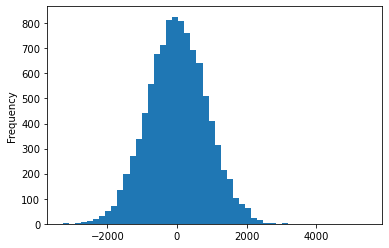

In [36]:
plt.figure()
df['Araw'].plot.hist(bins=50)

Covariance matrix is also very easy:

So is computing the basic statistical quantities:

In [46]:
print(df.cov())

              Counter           Araw       deltaX        deltaY
Counter  8.334167e+06  -55180.716825 -3869.711081  -2165.675001
Araw    -5.518072e+04  720624.038710  2895.816516  19468.492473
deltaX  -3.869711e+03    2895.816516  3659.203561    861.523765
deltaY  -2.165675e+03   19468.492473   861.523765   1254.348020


So is the correlation matrix:

In [48]:
print(df.corr())

          Counter      Araw    deltaX    deltaY
Counter  1.000000 -0.022517 -0.022159 -0.021181
Araw    -0.022517  1.000000  0.056393  0.647543
deltaX  -0.022159  0.056393  1.000000  0.402129
deltaY  -0.021181  0.647543  0.402129  1.000000


It is even more instructive to plot it:

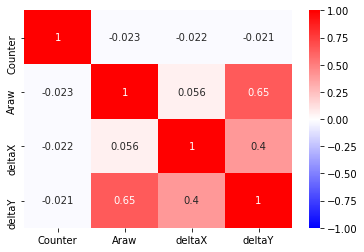

In [100]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True,cmap='bwr',vmin=-1,vmax=1)

#### Exercise

Plot histograms of `deltaX` and `deltaY` and compute their means and standard deviations

It is actually pretty easy to plot all columns:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9fd9fcac0>,
      dtype=object)

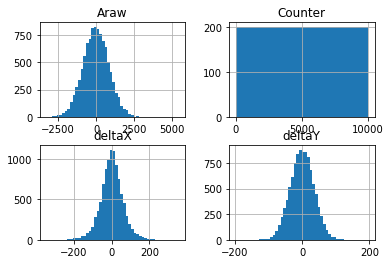

In [101]:
df.hist(bins=50)

Or even better, plot the correlations as scatter plots:

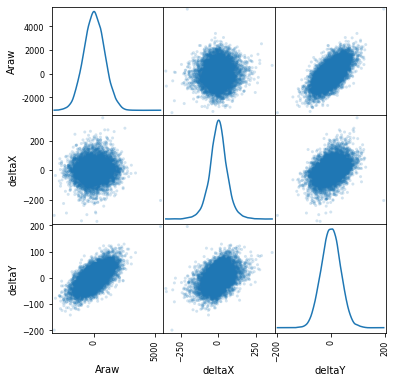

In [102]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Araw','deltaX','deltaY']], alpha=0.2, figsize=(6, 6), diagonal='kde');

Fitting to a gaussian distribition is straightforward: convert a column into numpy array

Gaussian parameters: mu = 0.443, sigma=848.9


Text(0.5, 0, 'Araw')

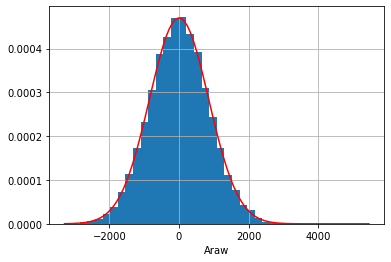

In [103]:
from scipy.stats import norm

par = norm.fit(df['Araw']) # distribution fitting
print ('Gaussian parameters: mu = {0:5.3f}, sigma={1:4.1f}'.format(par[0],par[1]))

# plot the histogram of the data; overlay fit 
df['Araw'].hist(bins=40,density=True)

# fitted distribution
x = np.linspace(df['Araw'].min(),df['Araw'].max(),100)
pdf_fitted = norm.pdf(x,loc=par[0],scale=par[1])
plt.plot(x,pdf_fitted,'r-')
plt.xlabel('Araw')

#### Exercise: 

Fit deltaX and deltaY variables

Example of linear regression of one variable against two others

In [104]:
import statsmodels.api as sm

linearRegress = sm.GLM.from_formula('Araw ~ deltaX+deltaY',data=df).fit()
linearRegress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Araw   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                      3.8276e+05
Method:                          IRLS   Log-Likelihood:                -78464.
Date:                Fri, 23 Oct 2020   Deviance:                   3.8264e+09
Time:                        01:18:58   Pearson chi2:                 3.83e+09
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2035      6.187      0.841      0.400      -6.923      17.330
deltaX        -3.4151      0.112    -30.571      0.000      -3.634      -3.196
deltaY        17.8664      0.191     93.640      0.000      17.492      18.240
==============================================================================
"""

Bin data into a profile histogram, overlay linear regression model

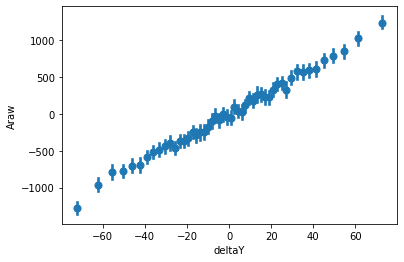

In [122]:
sns.regplot(x=df['deltaY'], y=df['Araw'], x_bins=50, fit_reg=None)

(-75.0, 75.0)

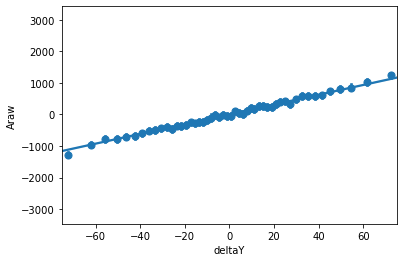

In [125]:
ax = sns.regplot(x=df['deltaY'], y=df['Araw'],x_bins=50)
ax.set_xlim(-75,75)

#### Exercise: plot linear regression of Araw vs deltaX